# WGAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGAN import WGAN
from utils.loaders import load_safari, load_cifar10



Using TensorFlow backend.


In [2]:
RUN_ID = '0018'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
label = 7
(x_train, y_train) = load_cifar10(label)
# (x_train, y_train) = load_safari('elephant')




## architecture

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


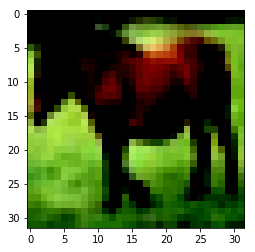

In [4]:
plt.imshow(x_train[0,:,:,:])

In [5]:
print(np.min(x_train))
print(np.max(x_train))

-1.0
1.0


In [6]:
x_train.shape

(5000, 32, 32, 3)

In [7]:
#works

gan = WGAN(input_dim = (32,32,3)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_conv_padding = 'same'
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'leaky_relu'
        , discriminator_dropout_rate = None
        , discriminator_learning_rate = 0.00005
        , generator_initial_dense_layer_size = (8, 8, 64)
        , generator_use_upsampling = [True,True, False,False]
        , generator_conv_t_filters = [128,64, 64,3]
        , generator_conv_t_kernel_size = [5,5,5,5]
        , generator_conv_t_strides = [1,1,1,1]
        , generator_conv_t_padding = 'same'
        , generator_batch_norm_momentum = 0.8
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.00005
        , optimiser = 'rmsprop'
        , z_dim = 100
        )


gan.save(RUN_FOLDER)




In [8]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [9]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 32, 32, 3)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 8, 8, 64)          102464    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
discriminator_conv_2 (Conv2D (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 4, 4, 128)         0         
__________

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              413696    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4096)              16384     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 4096)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 64)        0         
_________________________________________________________________
generator_conv_t_0 (Conv2DTr (None, 16, 16, 128)       204928    
__________

## training

In [11]:
d_losses, g_losses, d_accs, g_accs = gan.train(     
    x_train
    , batch_size = 128
    , epochs = 2000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 10
    , initial_epoch = 0
    , n_critic = 5
    , clip_threshold = 0.01
)

0 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (1.000, 0.000, 0.500)] [G loss: -0.0] [G acc: 1.000]
1 (5, 1) [D loss: (-0.0, 0.0, 0.0)] [D acc: (1.000, 0.000, 0.500)] [G loss: -0.0] [G acc: 1.000]
2 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (1.000, 0.000, 0.500)] [G loss: -0.0] [G acc: 1.000]
3 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (1.000, 0.000, 0.500)] [G loss: -0.0] [G acc: 1.000]
4 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (1.000, 0.000, 0.500)] [G loss: -0.0] [G acc: 0.906]
5 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (1.000, 0.000, 0.500)] [G loss: -0.0] [G acc: 1.000]
6 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.992, 0.000, 0.496)] [G loss: -0.0] [G acc: 0.945]
7 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (1.000, 0.000, 0.500)] [G loss: -0.0] [G acc: 0.977]
8 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (1.000, 0.000, 0.500)] [G loss: -0.0] [G acc: 0.961]
9 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.961, 0.055, 0.508)] [G loss: 0.0] [G acc: 0.461]
10 (5, 1) [D loss: (-0

84 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.117, 0.969, 0.543)] [G loss: 0.1] [G acc: 0.055]
85 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.102, 1.000, 0.551)] [G loss: 0.1] [G acc: 0.000]
86 (5, 1) [D loss: (0.1, -0.1, -0.0)] [D acc: (0.148, 0.984, 0.566)] [G loss: 0.1] [G acc: 0.156]
87 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.148, 0.977, 0.562)] [G loss: 0.1] [G acc: 0.000]
88 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.117, 0.992, 0.555)] [G loss: 0.1] [G acc: 0.000]
89 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.188, 0.977, 0.582)] [G loss: 0.1] [G acc: 0.125]
90 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.188, 0.969, 0.578)] [G loss: 0.1] [G acc: 0.008]
91 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.172, 0.945, 0.559)] [G loss: 0.0] [G acc: 0.125]
92 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.258, 0.992, 0.625)] [G loss: 0.1] [G acc: 0.000]
93 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.297, 0.984, 0.641)] [G loss: 0.0] [G acc: 0.109]
94 (5, 1) [D loss: (

167 (5, 1) [D loss: (-0.0, -0.1, -0.0)] [D acc: (0.469, 0.695, 0.582)] [G loss: 0.3] [G acc: 0.047]
168 (5, 1) [D loss: (-0.0, -0.1, -0.1)] [D acc: (0.531, 0.570, 0.551)] [G loss: 0.3] [G acc: 0.258]
169 (5, 1) [D loss: (-0.0, -0.1, -0.1)] [D acc: (0.594, 0.555, 0.574)] [G loss: 0.2] [G acc: 0.375]
170 (5, 1) [D loss: (-0.1, -0.1, -0.1)] [D acc: (0.719, 0.547, 0.633)] [G loss: 0.1] [G acc: 0.492]
171 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.711, 0.406, 0.559)] [G loss: -0.0] [G acc: 0.602]
172 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.734, 0.422, 0.578)] [G loss: -0.1] [G acc: 0.625]
173 (5, 1) [D loss: (-0.2, 0.0, -0.1)] [D acc: (0.859, 0.375, 0.617)] [G loss: 0.0] [G acc: 0.398]
174 (5, 1) [D loss: (-0.1, 0.0, -0.1)] [D acc: (0.836, 0.453, 0.645)] [G loss: 0.1] [G acc: 0.109]
175 (5, 1) [D loss: (-0.1, -0.0, -0.1)] [D acc: (0.703, 0.648, 0.676)] [G loss: 0.2] [G acc: 0.188]
176 (5, 1) [D loss: (-0.2, 0.0, -0.1)] [D acc: (0.688, 0.586, 0.637)] [G loss: 0.1] [G acc: 0.312]
177

250 (5, 1) [D loss: (0.2, -2.4, -1.1)] [D acc: (0.492, 0.992, 0.742)] [G loss: 2.5] [G acc: 0.008]
251 (5, 1) [D loss: (-0.1, -1.1, -0.6)] [D acc: (0.578, 0.672, 0.625)] [G loss: 0.8] [G acc: 0.398]
252 (5, 1) [D loss: (-0.1, 0.4, 0.2)] [D acc: (0.547, 0.375, 0.461)] [G loss: -0.3] [G acc: 0.570]
253 (5, 1) [D loss: (-0.6, 1.6, 0.5)] [D acc: (0.727, 0.055, 0.391)] [G loss: -1.3] [G acc: 0.859]
254 (5, 1) [D loss: (-1.2, 1.8, 0.3)] [D acc: (0.914, 0.000, 0.457)] [G loss: -1.7] [G acc: 1.000]
255 (5, 1) [D loss: (-1.3, 1.9, 0.3)] [D acc: (0.953, 0.000, 0.477)] [G loss: -1.8] [G acc: 1.000]
256 (5, 1) [D loss: (-1.6, 1.9, 0.2)] [D acc: (0.984, 0.000, 0.492)] [G loss: -1.7] [G acc: 1.000]
257 (5, 1) [D loss: (-1.6, 1.8, 0.1)] [D acc: (1.000, 0.000, 0.500)] [G loss: -1.6] [G acc: 1.000]
258 (5, 1) [D loss: (-1.7, 1.7, 0.0)] [D acc: (1.000, 0.000, 0.500)] [G loss: -1.4] [G acc: 1.000]
259 (5, 1) [D loss: (-1.6, 1.6, -0.0)] [D acc: (1.000, 0.000, 0.500)] [G loss: -1.4] [G acc: 1.000]
260 (5, 

333 (5, 1) [D loss: (0.5, -1.2, -0.4)] [D acc: (0.359, 0.742, 0.551)] [G loss: 1.8] [G acc: 0.141]
334 (5, 1) [D loss: (0.6, -1.1, -0.2)] [D acc: (0.383, 0.703, 0.543)] [G loss: 1.5] [G acc: 0.266]
335 (5, 1) [D loss: (0.3, -0.7, -0.2)] [D acc: (0.367, 0.719, 0.543)] [G loss: 0.9] [G acc: 0.133]
336 (5, 1) [D loss: (0.3, -0.4, -0.1)] [D acc: (0.469, 0.742, 0.605)] [G loss: 0.5] [G acc: 0.203]
337 (5, 1) [D loss: (0.2, -0.2, -0.0)] [D acc: (0.461, 0.625, 0.543)] [G loss: 0.1] [G acc: 0.461]
338 (5, 1) [D loss: (-0.1, -0.2, -0.1)] [D acc: (0.625, 0.641, 0.633)] [G loss: 0.1] [G acc: 0.422]
339 (5, 1) [D loss: (-0.2, 0.1, -0.1)] [D acc: (0.617, 0.492, 0.555)] [G loss: 0.1] [G acc: 0.398]
340 (5, 1) [D loss: (-0.3, -0.0, -0.2)] [D acc: (0.836, 0.531, 0.684)] [G loss: 0.3] [G acc: 0.195]
341 (5, 1) [D loss: (-0.4, -0.3, -0.4)] [D acc: (0.828, 0.648, 0.738)] [G loss: 0.7] [G acc: 0.109]
342 (5, 1) [D loss: (-0.4, -0.4, -0.4)] [D acc: (0.820, 0.789, 0.805)] [G loss: 1.0] [G acc: 0.000]
343 (5

416 (5, 1) [D loss: (0.4, -0.7, -0.1)] [D acc: (0.086, 0.938, 0.512)] [G loss: 0.9] [G acc: 0.016]
417 (5, 1) [D loss: (0.3, -0.5, -0.1)] [D acc: (0.195, 0.883, 0.539)] [G loss: 0.8] [G acc: 0.000]
418 (5, 1) [D loss: (0.4, -0.6, -0.1)] [D acc: (0.070, 0.992, 0.531)] [G loss: 0.9] [G acc: 0.000]
419 (5, 1) [D loss: (0.5, -0.7, -0.1)] [D acc: (0.141, 0.977, 0.559)] [G loss: 1.0] [G acc: 0.008]
420 (5, 1) [D loss: (0.6, -0.6, -0.0)] [D acc: (0.117, 0.906, 0.512)] [G loss: 1.0] [G acc: 0.000]
421 (5, 1) [D loss: (0.6, -0.8, -0.1)] [D acc: (0.086, 0.969, 0.527)] [G loss: 1.1] [G acc: 0.000]
422 (5, 1) [D loss: (0.7, -0.9, -0.1)] [D acc: (0.008, 1.000, 0.504)] [G loss: 1.1] [G acc: 0.000]
423 (5, 1) [D loss: (0.7, -0.9, -0.1)] [D acc: (0.000, 1.000, 0.500)] [G loss: 1.1] [G acc: 0.000]
424 (5, 1) [D loss: (0.8, -0.9, -0.1)] [D acc: (0.062, 1.000, 0.531)] [G loss: 1.2] [G acc: 0.000]
425 (5, 1) [D loss: (0.8, -1.0, -0.1)] [D acc: (0.023, 1.000, 0.512)] [G loss: 1.3] [G acc: 0.000]
426 (5, 1)

499 (5, 1) [D loss: (0.5, -0.6, -0.0)] [D acc: (0.016, 0.984, 0.500)] [G loss: 0.8] [G acc: 0.000]
500 (5, 1) [D loss: (0.6, -0.7, -0.1)] [D acc: (0.000, 1.000, 0.500)] [G loss: 0.9] [G acc: 0.000]
501 (5, 1) [D loss: (0.6, -0.7, -0.0)] [D acc: (0.023, 1.000, 0.512)] [G loss: 0.9] [G acc: 0.000]
502 (5, 1) [D loss: (0.5, -0.6, -0.0)] [D acc: (0.023, 1.000, 0.512)] [G loss: 0.7] [G acc: 0.000]
503 (5, 1) [D loss: (0.4, -0.5, -0.1)] [D acc: (0.141, 0.945, 0.543)] [G loss: 0.8] [G acc: 0.008]
504 (5, 1) [D loss: (0.4, -0.5, -0.1)] [D acc: (0.086, 0.969, 0.527)] [G loss: 0.6] [G acc: 0.016]
505 (5, 1) [D loss: (0.3, -0.4, -0.0)] [D acc: (0.109, 0.922, 0.516)] [G loss: 0.6] [G acc: 0.008]
506 (5, 1) [D loss: (0.4, -0.4, -0.0)] [D acc: (0.148, 0.914, 0.531)] [G loss: 0.7] [G acc: 0.031]
507 (5, 1) [D loss: (0.4, -0.6, -0.1)] [D acc: (0.062, 1.000, 0.531)] [G loss: 0.8] [G acc: 0.000]
508 (5, 1) [D loss: (0.4, -0.6, -0.1)] [D acc: (0.031, 0.992, 0.512)] [G loss: 0.8] [G acc: 0.000]
509 (5, 1)

582 (5, 1) [D loss: (0.2, -0.2, -0.0)] [D acc: (0.164, 0.898, 0.531)] [G loss: 0.4] [G acc: 0.000]
583 (5, 1) [D loss: (0.1, -0.3, -0.1)] [D acc: (0.219, 0.953, 0.586)] [G loss: 0.4] [G acc: 0.000]
584 (5, 1) [D loss: (0.1, -0.3, -0.1)] [D acc: (0.312, 0.891, 0.602)] [G loss: 0.4] [G acc: 0.070]
585 (5, 1) [D loss: (0.2, -0.2, -0.0)] [D acc: (0.203, 0.820, 0.512)] [G loss: 0.4] [G acc: 0.016]
586 (5, 1) [D loss: (0.2, -0.2, -0.0)] [D acc: (0.227, 0.914, 0.570)] [G loss: 0.5] [G acc: 0.023]
587 (5, 1) [D loss: (0.2, -0.3, -0.0)] [D acc: (0.172, 0.859, 0.516)] [G loss: 0.4] [G acc: 0.109]
588 (5, 1) [D loss: (0.3, -0.3, -0.0)] [D acc: (0.180, 0.797, 0.488)] [G loss: 0.4] [G acc: 0.148]
589 (5, 1) [D loss: (0.3, -0.2, 0.0)] [D acc: (0.148, 0.758, 0.453)] [G loss: 0.4] [G acc: 0.148]
590 (5, 1) [D loss: (0.3, -0.3, 0.0)] [D acc: (0.148, 0.789, 0.469)] [G loss: 0.5] [G acc: 0.070]
591 (5, 1) [D loss: (0.3, -0.3, 0.0)] [D acc: (0.062, 0.883, 0.473)] [G loss: 0.5] [G acc: 0.047]
592 (5, 1) [D

665 (5, 1) [D loss: (0.1, -0.2, -0.1)] [D acc: (0.500, 0.633, 0.566)] [G loss: 0.2] [G acc: 0.359]
666 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.469, 0.531, 0.500)] [G loss: 0.2] [G acc: 0.102]
667 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.414, 0.688, 0.551)] [G loss: 0.1] [G acc: 0.234]
668 (5, 1) [D loss: (-0.0, -0.1, -0.0)] [D acc: (0.461, 0.734, 0.598)] [G loss: 0.2] [G acc: 0.172]
669 (5, 1) [D loss: (0.1, -0.2, -0.0)] [D acc: (0.305, 0.828, 0.566)] [G loss: 0.2] [G acc: 0.234]
670 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.344, 0.719, 0.531)] [G loss: 0.2] [G acc: 0.164]
671 (5, 1) [D loss: (-0.0, -0.1, -0.1)] [D acc: (0.461, 0.781, 0.621)] [G loss: 0.2] [G acc: 0.188]
672 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.383, 0.641, 0.512)] [G loss: 0.2] [G acc: 0.203]
673 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.344, 0.891, 0.617)] [G loss: 0.3] [G acc: 0.008]
674 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.438, 0.750, 0.594)] [G loss: 0.2] [G acc: 0.211]
675 (5, 

748 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.570, 0.477, 0.523)] [G loss: 0.1] [G acc: 0.102]
749 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.562, 0.477, 0.520)] [G loss: 0.1] [G acc: 0.141]
750 (5, 1) [D loss: (-0.1, -0.0, -0.0)] [D acc: (0.586, 0.703, 0.645)] [G loss: 0.1] [G acc: 0.234]
751 (5, 1) [D loss: (-0.0, -0.1, -0.1)] [D acc: (0.641, 0.633, 0.637)] [G loss: 0.2] [G acc: 0.250]
752 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.555, 0.539, 0.547)] [G loss: 0.1] [G acc: 0.133]
753 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.586, 0.602, 0.594)] [G loss: 0.1] [G acc: 0.047]
754 (5, 1) [D loss: (-0.0, -0.1, -0.0)] [D acc: (0.555, 0.609, 0.582)] [G loss: 0.1] [G acc: 0.242]
755 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.617, 0.414, 0.516)] [G loss: 0.1] [G acc: 0.133]
756 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.656, 0.516, 0.586)] [G loss: 0.1] [G acc: 0.086]
757 (5, 1) [D loss: (-0.1, -0.0, -0.0)] [D acc: (0.602, 0.578, 0.590)] [G loss: 0.1] [G acc: 0.148]
758

831 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.398, 0.727, 0.562)] [G loss: 0.2] [G acc: 0.109]
832 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.375, 0.703, 0.539)] [G loss: 0.2] [G acc: 0.016]
833 (5, 1) [D loss: (0.1, -0.1, -0.0)] [D acc: (0.352, 0.820, 0.586)] [G loss: 0.3] [G acc: 0.000]
834 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.352, 0.906, 0.629)] [G loss: 0.2] [G acc: 0.047]
835 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.312, 0.781, 0.547)] [G loss: 0.2] [G acc: 0.055]
836 (5, 1) [D loss: (0.1, -0.1, -0.0)] [D acc: (0.266, 0.805, 0.535)] [G loss: 0.2] [G acc: 0.094]
837 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.367, 0.719, 0.543)] [G loss: 0.2] [G acc: 0.016]
838 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.398, 0.742, 0.570)] [G loss: 0.2] [G acc: 0.055]
839 (5, 1) [D loss: (-0.0, -0.1, -0.1)] [D acc: (0.609, 0.633, 0.621)] [G loss: 0.1] [G acc: 0.328]
840 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.508, 0.695, 0.602)] [G loss: 0.1] [G acc: 0.195]
841 (5, 

914 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.273, 0.836, 0.555)] [G loss: 0.2] [G acc: 0.047]
915 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.359, 0.812, 0.586)] [G loss: 0.2] [G acc: 0.094]
916 (5, 1) [D loss: (0.0, -0.2, -0.1)] [D acc: (0.461, 0.734, 0.598)] [G loss: 0.2] [G acc: 0.266]
917 (5, 1) [D loss: (-0.0, -0.1, -0.0)] [D acc: (0.438, 0.789, 0.613)] [G loss: 0.2] [G acc: 0.086]
918 (5, 1) [D loss: (-0.0, -0.1, -0.0)] [D acc: (0.539, 0.750, 0.645)] [G loss: 0.2] [G acc: 0.023]
919 (5, 1) [D loss: (-0.0, -0.1, -0.1)] [D acc: (0.586, 0.758, 0.672)] [G loss: 0.2] [G acc: 0.039]
920 (5, 1) [D loss: (-0.0, -0.1, -0.0)] [D acc: (0.523, 0.727, 0.625)] [G loss: 0.2] [G acc: 0.016]
921 (5, 1) [D loss: (-0.1, -0.0, -0.0)] [D acc: (0.602, 0.641, 0.621)] [G loss: 0.1] [G acc: 0.109]
922 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.523, 0.562, 0.543)] [G loss: 0.1] [G acc: 0.133]
923 (5, 1) [D loss: (-0.0, 0.0, 0.0)] [D acc: (0.461, 0.453, 0.457)] [G loss: 0.1] [G acc: 0.156]
924 (

997 (5, 1) [D loss: (-0.1, -0.1, -0.1)] [D acc: (0.648, 0.680, 0.664)] [G loss: 0.2] [G acc: 0.109]
998 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.594, 0.602, 0.598)] [G loss: 0.1] [G acc: 0.125]
999 (5, 1) [D loss: (-0.1, 0.0, -0.0)] [D acc: (0.578, 0.469, 0.523)] [G loss: 0.1] [G acc: 0.148]
1000 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.469, 0.648, 0.559)] [G loss: 0.1] [G acc: 0.281]
1001 (5, 1) [D loss: (-0.1, -0.0, -0.1)] [D acc: (0.641, 0.578, 0.609)] [G loss: 0.1] [G acc: 0.250]
1002 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.672, 0.492, 0.582)] [G loss: 0.1] [G acc: 0.109]
1003 (5, 1) [D loss: (-0.1, -0.0, -0.0)] [D acc: (0.516, 0.594, 0.555)] [G loss: 0.1] [G acc: 0.367]
1004 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.516, 0.555, 0.535)] [G loss: 0.1] [G acc: 0.078]
1005 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.484, 0.586, 0.535)] [G loss: 0.2] [G acc: 0.078]
1006 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.414, 0.797, 0.605)] [G loss: 0.2] [G acc: 0.0

1079 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.281, 0.789, 0.535)] [G loss: 0.2] [G acc: 0.109]
1080 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.367, 0.750, 0.559)] [G loss: 0.2] [G acc: 0.086]
1081 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.320, 0.781, 0.551)] [G loss: 0.2] [G acc: 0.109]
1082 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.359, 0.703, 0.531)] [G loss: 0.2] [G acc: 0.102]
1083 (5, 1) [D loss: (0.1, -0.1, -0.0)] [D acc: (0.344, 0.820, 0.582)] [G loss: 0.2] [G acc: 0.016]
1084 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.273, 0.812, 0.543)] [G loss: 0.2] [G acc: 0.031]
1085 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.398, 0.672, 0.535)] [G loss: 0.2] [G acc: 0.086]
1086 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.383, 0.719, 0.551)] [G loss: 0.2] [G acc: 0.008]
1087 (5, 1) [D loss: (-0.0, -0.1, -0.0)] [D acc: (0.453, 0.836, 0.645)] [G loss: 0.2] [G acc: 0.062]
1088 (5, 1) [D loss: (-0.0, -0.1, -0.1)] [D acc: (0.414, 0.773, 0.594)] [G loss: 0.1] [G acc: 0.188

1161 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.375, 0.703, 0.539)] [G loss: 0.1] [G acc: 0.078]
1162 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.383, 0.758, 0.570)] [G loss: 0.2] [G acc: 0.008]
1163 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.430, 0.625, 0.527)] [G loss: 0.1] [G acc: 0.109]
1164 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.539, 0.641, 0.590)] [G loss: 0.1] [G acc: 0.289]
1165 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.469, 0.648, 0.559)] [G loss: 0.1] [G acc: 0.125]
1166 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.422, 0.664, 0.543)] [G loss: 0.1] [G acc: 0.219]
1167 (5, 1) [D loss: (-0.0, -0.1, -0.0)] [D acc: (0.547, 0.664, 0.605)] [G loss: 0.1] [G acc: 0.273]
1168 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.461, 0.570, 0.516)] [G loss: 0.1] [G acc: 0.086]
1169 (5, 1) [D loss: (-0.0, -0.1, -0.0)] [D acc: (0.406, 0.828, 0.617)] [G loss: 0.1] [G acc: 0.109]
1170 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.422, 0.727, 0.574)] [G loss: 0.2] [G acc: 0.

1243 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.383, 0.773, 0.578)] [G loss: 0.2] [G acc: 0.141]
1244 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.445, 0.695, 0.570)] [G loss: 0.1] [G acc: 0.148]
1245 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.320, 0.836, 0.578)] [G loss: 0.2] [G acc: 0.031]
1246 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.336, 0.781, 0.559)] [G loss: 0.1] [G acc: 0.125]
1247 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.297, 0.922, 0.609)] [G loss: 0.2] [G acc: 0.102]
1248 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.273, 0.859, 0.566)] [G loss: 0.2] [G acc: 0.008]
1249 (5, 1) [D loss: (0.1, -0.1, -0.0)] [D acc: (0.219, 0.852, 0.535)] [G loss: 0.2] [G acc: 0.039]
1250 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.289, 0.820, 0.555)] [G loss: 0.2] [G acc: 0.156]
1251 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.305, 0.797, 0.551)] [G loss: 0.2] [G acc: 0.008]
1252 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.312, 0.891, 0.602)] [G loss: 0.2] [G acc: 0.016]


1325 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.320, 0.867, 0.594)] [G loss: 0.2] [G acc: 0.039]
1326 (5, 1) [D loss: (-0.0, -0.1, -0.0)] [D acc: (0.453, 0.805, 0.629)] [G loss: 0.1] [G acc: 0.109]
1327 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.406, 0.719, 0.562)] [G loss: 0.1] [G acc: 0.141]
1328 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.391, 0.766, 0.578)] [G loss: 0.2] [G acc: 0.016]
1329 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.398, 0.859, 0.629)] [G loss: 0.2] [G acc: 0.086]
1330 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.367, 0.867, 0.617)] [G loss: 0.2] [G acc: 0.031]
1331 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.375, 0.773, 0.574)] [G loss: 0.2] [G acc: 0.031]
1332 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.352, 0.734, 0.543)] [G loss: 0.1] [G acc: 0.102]
1333 (5, 1) [D loss: (-0.0, -0.1, -0.0)] [D acc: (0.430, 0.789, 0.609)] [G loss: 0.1] [G acc: 0.070]
1334 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.438, 0.789, 0.613)] [G loss: 0.1] [G acc: 0.1

1407 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.414, 0.633, 0.523)] [G loss: 0.1] [G acc: 0.227]
1408 (5, 1) [D loss: (-0.0, -0.1, -0.0)] [D acc: (0.406, 0.711, 0.559)] [G loss: 0.1] [G acc: 0.195]
1409 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.438, 0.695, 0.566)] [G loss: 0.1] [G acc: 0.086]
1410 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.352, 0.734, 0.543)] [G loss: 0.1] [G acc: 0.016]
1411 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.422, 0.688, 0.555)] [G loss: 0.1] [G acc: 0.070]
1412 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.375, 0.758, 0.566)] [G loss: 0.1] [G acc: 0.102]
1413 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.328, 0.750, 0.539)] [G loss: 0.1] [G acc: 0.125]
1414 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.273, 0.922, 0.598)] [G loss: 0.2] [G acc: 0.023]
1415 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.422, 0.750, 0.586)] [G loss: 0.1] [G acc: 0.031]
1416 (5, 1) [D loss: (-0.0, -0.1, -0.0)] [D acc: (0.430, 0.828, 0.629)] [G loss: 0.1] [G acc: 0.109

1489 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.430, 0.688, 0.559)] [G loss: 0.1] [G acc: 0.078]
1490 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.461, 0.734, 0.598)] [G loss: 0.1] [G acc: 0.109]
1491 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.406, 0.750, 0.578)] [G loss: 0.1] [G acc: 0.086]
1492 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.383, 0.641, 0.512)] [G loss: 0.1] [G acc: 0.227]
1493 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.398, 0.758, 0.578)] [G loss: 0.1] [G acc: 0.086]
1494 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.492, 0.672, 0.582)] [G loss: 0.1] [G acc: 0.164]
1495 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.617, 0.648, 0.633)] [G loss: 0.1] [G acc: 0.117]
1496 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.484, 0.570, 0.527)] [G loss: 0.1] [G acc: 0.203]
1497 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.430, 0.609, 0.520)] [G loss: 0.1] [G acc: 0.281]
1498 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.367, 0.695, 0.531)] [G loss: 0.1] [G acc: 0.07

1571 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.391, 0.766, 0.578)] [G loss: 0.1] [G acc: 0.125]
1572 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.336, 0.680, 0.508)] [G loss: 0.1] [G acc: 0.141]
1573 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.336, 0.789, 0.562)] [G loss: 0.1] [G acc: 0.094]
1574 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.336, 0.766, 0.551)] [G loss: 0.1] [G acc: 0.117]
1575 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.367, 0.773, 0.570)] [G loss: 0.1] [G acc: 0.102]
1576 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.289, 0.836, 0.562)] [G loss: 0.1] [G acc: 0.102]
1577 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.250, 0.742, 0.496)] [G loss: 0.1] [G acc: 0.109]
1578 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.227, 0.773, 0.500)] [G loss: 0.1] [G acc: 0.070]
1579 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.320, 0.820, 0.570)] [G loss: 0.1] [G acc: 0.109]
1580 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.375, 0.766, 0.570)] [G loss: 0.1] [G acc: 0.164]


1653 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.547, 0.711, 0.629)] [G loss: 0.1] [G acc: 0.234]
1654 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.516, 0.555, 0.535)] [G loss: 0.1] [G acc: 0.242]
1655 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.633, 0.641, 0.637)] [G loss: 0.1] [G acc: 0.234]
1656 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.617, 0.531, 0.574)] [G loss: 0.1] [G acc: 0.375]
1657 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.641, 0.422, 0.531)] [G loss: 0.0] [G acc: 0.461]
1658 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.617, 0.500, 0.559)] [G loss: 0.0] [G acc: 0.508]
1659 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.570, 0.500, 0.535)] [G loss: 0.0] [G acc: 0.422]
1660 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.602, 0.547, 0.574)] [G loss: 0.0] [G acc: 0.219]
1661 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.578, 0.570, 0.574)] [G loss: 0.1] [G acc: 0.195]
1662 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.523, 0.633, 0.578)] [G loss: 0.1] [G acc: 0

1735 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.539, 0.617, 0.578)] [G loss: 0.1] [G acc: 0.195]
1736 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.539, 0.727, 0.633)] [G loss: 0.1] [G acc: 0.102]
1737 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.516, 0.688, 0.602)] [G loss: 0.1] [G acc: 0.305]
1738 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.500, 0.695, 0.598)] [G loss: 0.1] [G acc: 0.148]
1739 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.461, 0.719, 0.590)] [G loss: 0.1] [G acc: 0.109]
1740 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.422, 0.680, 0.551)] [G loss: 0.1] [G acc: 0.375]
1741 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.453, 0.695, 0.574)] [G loss: 0.1] [G acc: 0.180]
1742 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.508, 0.680, 0.594)] [G loss: 0.1] [G acc: 0.117]
1743 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.547, 0.633, 0.590)] [G loss: 0.1] [G acc: 0.180]
1744 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.547, 0.641, 0.594)] [G loss: 0.1] [G acc: 0

1817 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.555, 0.672, 0.613)] [G loss: 0.1] [G acc: 0.141]
1818 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.461, 0.672, 0.566)] [G loss: 0.1] [G acc: 0.133]
1819 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.586, 0.633, 0.609)] [G loss: 0.1] [G acc: 0.023]
1820 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.398, 0.789, 0.594)] [G loss: 0.1] [G acc: 0.102]
1821 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.484, 0.664, 0.574)] [G loss: 0.1] [G acc: 0.141]
1822 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.352, 0.703, 0.527)] [G loss: 0.1] [G acc: 0.102]
1823 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.375, 0.828, 0.602)] [G loss: 0.1] [G acc: 0.078]
1824 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.391, 0.719, 0.555)] [G loss: 0.1] [G acc: 0.148]
1825 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.461, 0.758, 0.609)] [G loss: 0.1] [G acc: 0.109]
1826 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.414, 0.688, 0.551)] [G loss: 0.1] [G acc: 0.047

1899 (5, 1) [D loss: (-0.0, -0.1, -0.0)] [D acc: (0.531, 0.758, 0.645)] [G loss: 0.1] [G acc: 0.250]
1900 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.508, 0.641, 0.574)] [G loss: 0.1] [G acc: 0.352]
1901 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.508, 0.656, 0.582)] [G loss: 0.1] [G acc: 0.258]
1902 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.516, 0.641, 0.578)] [G loss: 0.0] [G acc: 0.320]
1903 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.461, 0.648, 0.555)] [G loss: 0.0] [G acc: 0.258]
1904 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.469, 0.695, 0.582)] [G loss: 0.1] [G acc: 0.078]
1905 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.594, 0.703, 0.648)] [G loss: 0.1] [G acc: 0.109]
1906 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.570, 0.625, 0.598)] [G loss: 0.1] [G acc: 0.109]
1907 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.594, 0.641, 0.617)] [G loss: 0.1] [G acc: 0.188]
1908 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.617, 0.461, 0.539)] [G loss: 0.0] [G acc: 

1981 (5, 1) [D loss: (-0.0, 0.0, -0.0)] [D acc: (0.633, 0.461, 0.547)] [G loss: 0.0] [G acc: 0.266]
1982 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.633, 0.602, 0.617)] [G loss: 0.0] [G acc: 0.320]
1983 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.500, 0.602, 0.551)] [G loss: 0.0] [G acc: 0.219]
1984 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.531, 0.742, 0.637)] [G loss: 0.0] [G acc: 0.219]
1985 (5, 1) [D loss: (-0.0, -0.0, -0.0)] [D acc: (0.492, 0.711, 0.602)] [G loss: 0.1] [G acc: 0.164]
1986 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.414, 0.641, 0.527)] [G loss: 0.1] [G acc: 0.188]
1987 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.422, 0.711, 0.566)] [G loss: 0.1] [G acc: 0.211]
1988 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.469, 0.844, 0.656)] [G loss: 0.1] [G acc: 0.102]
1989 (5, 1) [D loss: (0.0, -0.1, -0.0)] [D acc: (0.406, 0.648, 0.527)] [G loss: 0.1] [G acc: 0.195]
1990 (5, 1) [D loss: (0.0, -0.0, -0.0)] [D acc: (0.367, 0.695, 0.531)] [G loss: 0.1] [G acc: 0.0

In [34]:
idx = np.random.randint(0, x_train.shape[0], 1)[0]
gan.discriminator.predict(np.array([x_train[idx]]))

array([[-0.03360331]], dtype=float32)

In [44]:
noise = np.random.normal(0, 1, (1, gan.z_dim))
gen_imgs = gan.generator.predict(noise)
gan.discriminator.predict(np.array([gen_imgs[0]]))

array([[0.03751623]], dtype=float32)

In [14]:
gan.train_discriminator(x_train, batch_size = 32, clip_threshold = 0.01)

((-0.01713574, 0.001000918, -0.008067410439252853),
 (0.46875, 0.5625, 0.515625))

In [15]:
fake = np.ones((128,1))
noise = np.random.normal(0, 1, (128, 100))
gen_imgs = gan.generator.predict(noise)
gan.discriminator.train_on_batch(gen_imgs, fake)

[-0.05335851, 0.7734375]

In [16]:
[(np.min(x), np.max(x)) for x in gan.discriminator.get_weights()]

[(-0.0100784, 0.010095553),
 (-0.010097719, -0.00041617706),
 (-0.0101214815, 0.010114584),
 (-0.00999394, 0.010107452),
 (-0.010137756, 0.010127448),
 (-0.0005538967, 0.008108985),
 (-0.010120015, 0.010137616),
 (0.0021770538, 0.010074784),
 (-0.01006801, 0.00996965),
 (1.9722433e-05, 1.9722433e-05)]

In [17]:
gan.train_generator(batch_size = 128)

[0.06293951, 0.1953125]

In [18]:
[np.round((np.min(x), np.max(x)), 4) for x in gan.generator.get_weights()]

[array([-0.0926,  0.09  ], dtype=float32),
 array([-1.e-04,  1.e-04], dtype=float32),
 array([0.97  , 1.0332], dtype=float32),
 array([-0.0325,  0.0343], dtype=float32),
 array([-0.0224,  0.0203], dtype=float32),
 array([0.0217, 0.0633], dtype=float32),
 array([-0.1082,  0.0922], dtype=float32),
 array([-0.0004,  0.0005], dtype=float32),
 array([0.9825, 1.0171], dtype=float32),
 array([-0.0094,  0.0095], dtype=float32),
 array([-1.9234,  1.3076], dtype=float32),
 array([0.2387, 0.6334], dtype=float32),
 array([-0.083 ,  0.0921], dtype=float32),
 array([-0.0011,  0.0008], dtype=float32),
 array([0.98  , 1.0178], dtype=float32),
 array([-0.0228,  0.012 ], dtype=float32),
 array([-2.1515,  1.3317], dtype=float32),
 array([0.8317, 6.7336], dtype=float32),
 array([-0.0862,  0.0882], dtype=float32),
 array([-0.0021,  0.0023], dtype=float32),
 array([0.9906, 1.0179], dtype=float32),
 array([-0.0161,  0.0011], dtype=float32),
 array([-0.5359,  0.6009], dtype=float32),
 array([0.1654, 2.7305], 

In [19]:
plt.imshow(np.clip((x[200]+1)*0.5,0,1))

NameError: name 'x' is not defined

In [ ]:
gan.discriminator.predict(x)

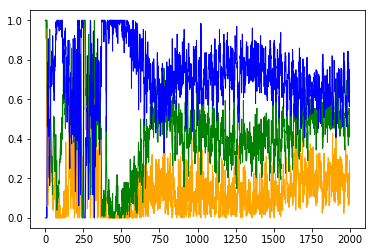

In [53]:
plt.plot(g_accs, color='orange', linewidth=1)
plt.plot([x[0] for x in d_accs], color='green', linewidth=1)
plt.plot([x[1] for x in d_accs], color='blue', linewidth=1)



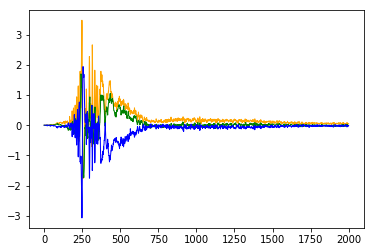

In [52]:
plt.plot(g_losses, color='orange', linewidth=1)
plt.plot([x[0] for x in d_losses], color='green', linewidth=1)
plt.plot([x[1] for x in d_losses], color='blue', linewidth=1)


In [ ]:
for i in range(100):
    print(gan.discriminator.predict(np.array([x_train[i]]))[0])

In [ ]:
noise = np.random.normal(0, 1, 100)
img = gan.generator.predict(np.array([noise]))[0]

print(img.shape)
plt.imshow(np.clip((img+1)*0.5,0,1))

gan.discriminator.predict(np.array([img]))[0]

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.generator.get_weights()

In [ ]:
gan.discriminator.layers

In [ ]:
pointer = 0
for x, y in enumerate(gan.discriminator.layers):
    
    print(y)
    print(y.trainable)
    for i in gan.discriminator.layers[x].get_weights():
        
        print(pointer)
        print(i.shape)
        pointer+=1
        
        

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.discriminator.get_weights()[2]

In [ ]:
gan.discriminator.get_weights()[22]

In [ ]:
x_train[0][16]

In [54]:
gan.model.save_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))